# Ajuster un modèle aux données

Nous avons vu jusqu'ici plusieurs exemples de modèles en physique, et leur représentation numérique. Ces modèles sont construits pour réprésenter des données expérimentales ou des observations.

Les modèles dépendent d'un certain nombre de paramètres qu'il faut choisir afin de représenter aux mieux les données. Une méthode possible est d'utiliser les données expérimentales ou les observations afin de trouver le meilleur jeu de paramètres qui les représente à l'aide d'un modèle donné. On dit que l'on fait un **ajustement du modèle aux données**. En anglais on appelle cela un **fit**, terme qui est souvent repris par les physiciens, même en français.

Une méthode pour trouver le meilleur ajustement d'un modèle aux données est la méthode des moindres carrés, ce que nous allons voir ici.

## Paramètres d'un modèle

Reprenons le modèle de l'accéleration constante vu dans la séquence sur la démarche de modélisation. Nous avons mesuré la vitesse $v_i$ d'un objet pour des temps $t_i$. L'objet est lâché avec une vitesse initiale vers le bas d'environ 1,6 m/s. Voici le résultat des mesures:

|$i$|0|1|2|3|4|5|6|7|8|9|10|
|--|--|--|--|--|--|--|--|--|--|--|--|
|$t_i$|0.0|0.1|0.2|0.3|0.4|0.5|0.6|0.7|0.8|0.9|1.0|
|$v_i$|0.338|   -1.509|  -5.301|  -4.404|  -6.967|  -6.229|  -5.279|  -9.266|  -8.847| -11.260| -12.040|

Le modèle est:

$$
v(t;v_0,g) = v_0 - gt
$$

Nous déclarons que $v_0$ et $g$ sont les paramètres du modèle. Il est d'usage en physique de noter les paramètres après un point-virgule dans la fonction: $v(t;v_0,g)$, pour les distinguer de la variable libre $t$.

Nous supposons que les paramètres du modèle, $v_0$ et $g$, ne sont pas connu *a priori*. Nous allons utiliser les données expérimentales pour trouver les meilleures valeurs des paramètres possibles, d'après ces données.

Représentons graphiquement les données et le modèle:

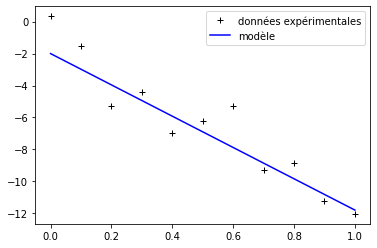

In [1]:
# importation des modules
import numpy as np
import matplotlib.pyplot as plt

# donnees experimentales
N = 11
t_exp = np.linspace(0,1,N)
v_exp = np.array([0.338, -1.509, -5.301, -4.404, -6.967, -6.229, -5.279, -9.266, -8.847, -11.260, -12.040])

# parametres du modèle
g = 9.8
v0 = -2

# discrétisation du modèle
t_mod = np.linspace(0,1,N)
v_mod = v0 - g*t_exp

# représentation graphique du modèle et des données
plt.plot(t_exp, v_exp, '+k', label = 'données expérimentales')
plt.plot(t_mod, v_mod, '-b', label = 'modèle')
plt.legend()
plt.show()

### Exercice
Ajuster la valeur des paramètres $v_0$ et $g$ *à la main*, c'est-à-dire en changeant directement leur valeur dans le script ci-dessus, afin que le modèle représente au mieux les données.

Quel est le critère qui vous permet de dire que le modèle représente mieux les données ?

##  La méthode des moindres-carrés

La méthode des moindres carrés permet d'utiliser un critère quantitatif afin de trouver le meilleur ajustement d'un modèle d'après des données expérimentales. Calculons la somme quadratique des écarts entre le modèle et les données du problème: 

$$
S = \sum_{i=0}^{N-1} (y_i - P(x_i))^2 
$$

Les couples $(x_i,y_i)$ sont les données expérimentales, alors que $y=P(x)$ est le modèle. Le but pour trouver le modèle le mieux ajusté aux données expérimentales est de minimiser la somme $S$.

Si on applique cela au problème de l'accéleration constante, on a:

$$
S(v_0,g) = \sum_{i=0}^{N-1} (v_i - (v_0 - g t_i))^2 
$$

$S$ est une fonction des paramètres du problème, qui doit avoir un minimum pour le meilleur ajustement du modèle au données (*best-fit* en anglais).

Représentons graphiquement cette somme:

[ 0.  -0.5 -1.  -1.5 -2.  -2.5 -3.  -3.5 -4.  -4.5 -5. ]


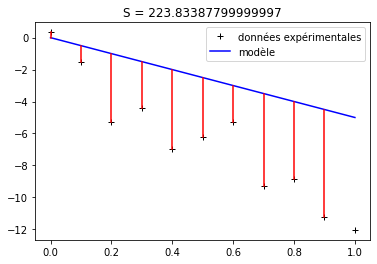

In [2]:
# parametres du modèle
g = 5
v0 = 0

# discrétisation du modèle
t_mod = np.linspace(0,1,N)
v_mod = v0 - g*t_exp
print(v_mod)

# calcul de la somme S
Si = (v_exp - (v0 - g*t_exp))**2
S = np.sum(Si)

# représentation graphique du modèle et des données
plt.plot(t_exp, v_exp, '+k', label = 'données expérimentales')
plt.plot(t_mod, v_mod, '-b', label = 'modèle')

# représentation des écarts entre le modèle et les données
for i in range(N-1):
    plt.plot((t_exp[i], t_exp[i]), (v_exp[i], v0 - g*t_exp[i]), '-r')

plt.title('S = '+str(S))
plt.legend()
plt.show()

### Exercice
Dans la cellule ci-dessus, calculer $S$ pour les paramètres trouvés à l'exercice précedent. Pouvez-vous améliorer la valeur des paramètres en vous basant sur la valeur de $S$?

Pourquoi les éléments de la somme des écarts entre les données et le modèle est-elle mise au carré?

## Régression linéaire
Pour un modèle linéaire tel que celui de l'accélération constante, il est possible de trouver le minimum de la fonction $S$ de façon analytique.

Le modèle linéaire est de la forme $P(x; a, b) = a + b x$. La somme $S$ s'écrit alors

$$
S(a,b) = \sum_{i=0}^{N-1} [y_i - (a + b x)]^2
$$

Le polynôme $S$ obtenu est du second degré en $a$ et $b$. Il peut s'écrire

$$
S(a,b) = a^2 \sum_{i=0}^{N-1} x_i^2 + 2 a b \sum_{i=0}^{N-1} x_i + N a^2 - 2 b \sum_{i=0}^{N-1} x_i y_i - 2 a \sum_{i=0}^{N-1} y_i + \sum_{i=0}^{N-1} y_i^2
$$

Une condition nécessaire pour que $S$ ait un minimum en $(a_m,b_m)$ est que le gradient de $S$ s'annule au point $(a_m,b_m)$:

\begin{eqnarray*}
\frac{\partial S}{\partial a} (a_m,b_m) & = & 0 \;\;\;\; \Rightarrow \;\;\;\; N a_m + b_m \sum_{i=0}^{N-1} x_i = \sum_{i=0}^{N-1} y_i\\
\frac{\partial S}{\partial b} (a_m,b_m) & = & 0 \;\;\;\; \Rightarrow \;\;\;\; N a_m \sum_{i=0}^{N-1} x_i + b_m \sum_{i=0}^{N-1} x_i^2 = \sum_{i=0}^{N-1} x_i y_i
\end{eqnarray*}

On obtient alors:

\begin{eqnarray*}
a_m &=& \bar{y}-b_m \bar{x}\\
b_m &=& \frac{cov(x,y)}{var(x)}
\end{eqnarray*}


où

\begin{eqnarray*}
            & \bar{x} = \frac{1}{N} \sum_{i=0}^{N-1} x_{i} \\
            & \bar{y} = \frac{1}{N} \sum_{i=0}^{N-1} y_{i} \\
            & cov(x,y) = \frac{1}{N} \sum_{i=0}^{N-1} (x_{i} - \bar{x}) (y_{i} - \bar{y_i}) = \left( \frac{1}{N} \sum_{i=0}^{N-1} x_{i} y_{i} \right) - \bar{x}\bar{y} \\
            & var(x) = \frac{1}{N} \sum_{i=0}^{N-1} (x_{i} - \bar{x})^2 = \left( \frac{1}{N} \sum_{i=0}^{N-1} x_{i}^2 \right) - \bar{x}^2
\end{eqnarray*}

La fonction suivante renvoie les paramètres $a$ et $b$ de la régression linéaire pour un jeu de données expérimental:

In [3]:
# fonction regression lineaire
def reglin(xi, yi):
    '''
        Calcul les paramètres a,b du meilleur ajustement d'un modèle linéaire
        y = ax + b sur un jeu de données (xi, yi)
    '''
    N = np.size(xi)
    
    xm = np.mean(xi)
    ym = np.mean(yi)
    cov = 1/N * np.sum(xi*yi) - xm*ym
    var = 1/N * np.sum(xi**2) - xm**2
    
    b = cov / var
    a = ym - b*xm
    
    return (a,b)

### Exercice
1. Faire une régression linéaire sur les données temps, vitesse: $(t_i,v_i)$ en utilisant la fonction `reglin()`.
2. Comparer le résultat obtenu avec les valeurs des paramètres trouvés "à la main" dans l'exercice précédent.
3. Calculer $S$ et comparer le celui obtenu à l'exercice précédent
3. Tracer les données et le modèle trouvé avec la régression linéaire

## La fonction `curve_fit`

La fonction `curve_fit` du module `optimize` de `scipy` permet d'ajuster n'importe quel modèle à des données expérimentales.

Voyons comment elle fonctionne avec les données de vitesse. Il faut d'abord définir la fonction python qui représente le modèle:

In [4]:
def modlin(x, a, b):
    '''
        Fonction qui représente le modèle linéaire
        y(x; a,b) = a + bx
    '''
    return a + b*x

<div class="alert alert-warning">

**Attention**

Dans la fonction python qui représente le modèle, il faut absolument que **la variable libre soit le premier argument** de la fonction. Suivent ensuite les paramètres du problème.
</div>

Nous importons ensuite la fonction `curve_fit`:

In [5]:
from scipy.optimize import curve_fit

Les arguments de la fonction `curve_fit` sont:

1. La fonction python qui repréente le modèle
2. Le tableau qui représente les données $x_i$
3. Le tableau qui représente les données $y_i$

v0 = -1.00 m.s**-1
g = 10.87 m.s**-2


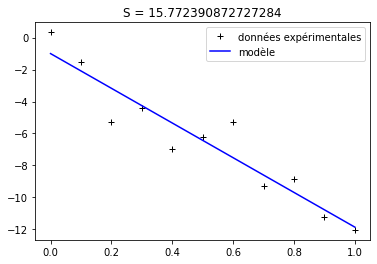

In [6]:
# ajustement du modèle linéaire
solution = curve_fit(modlin, t_exp, v_exp)

# identification des paramètres du modèle
a, b = solution[0]
v0 = a
g = -b

# affichage du resultat
print('v0 = {:4.2f} m.s**-1'.format(v0))
print('g = {:4.2f} m.s**-2'.format(g))

# calcul du modèle
t_mod = np.linspace(0,1,N)
v_mod = modlin(t_mod, a, b)

# calcul de la somme S
Si = (v_exp - modlin(t_exp, a, b))**2
S = np.sum(Si)

# représentation graphique du modèle et des données
plt.plot(t_exp, v_exp, '+k', label = 'données expérimentales')
plt.plot(t_mod, v_mod, '-b', label = 'modèle')
plt.title('S = '+str(S))
plt.legend()
plt.show()

On voit que l'on obtient le même résultat qu'avec la régression linéaire. Ce ne sont pourtant pas les mêmes méthodes numériques qui sont employées. En augmentant le nombre de chiffres après la virgule utilisés pour afficher les paramètres trouvés avec chaque méthode, vous verrez que les résultats finissent par différer. On appelle cela la précision numérique de la méthode numérique. On le voit aussi sur les sommes $S$ qui sont différentes, certe pas de beaucoup!

### Exercice
Grâce à la fonction `curve_fit`, on peut facilement changer de modèle. Définir un modèle quadratique de la forme $y(x;a,b,c) = a + bx + cx^2$, et ajuster les paramètres sur les données de vitesse. Calculer la somme $S$ et représenter le modèle et les données.